# Worksheet 10
Name : Sabarno Saha

Roll : 22MS037

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as st

# Use for good looking plots
import scienceplots
plt.style.use("science")
plt.rcParams.update({"font.size":22})

# Use this if latex or scienceplots arent installed
# plt.style.use("default")

# Can comment this but supports faster running times 
from numba import jit

# just so that I dont have to write np.random.rand  so many times !!
rand = np.random.rand

# Question 1

Generate a random integer between `n1` and `n2`

In [95]:
n1 = 5
n2 = 10
n = int((abs(n2-n1)/10)*np.floor(10*np.random.rand()) + min(n1,n2))
n


7

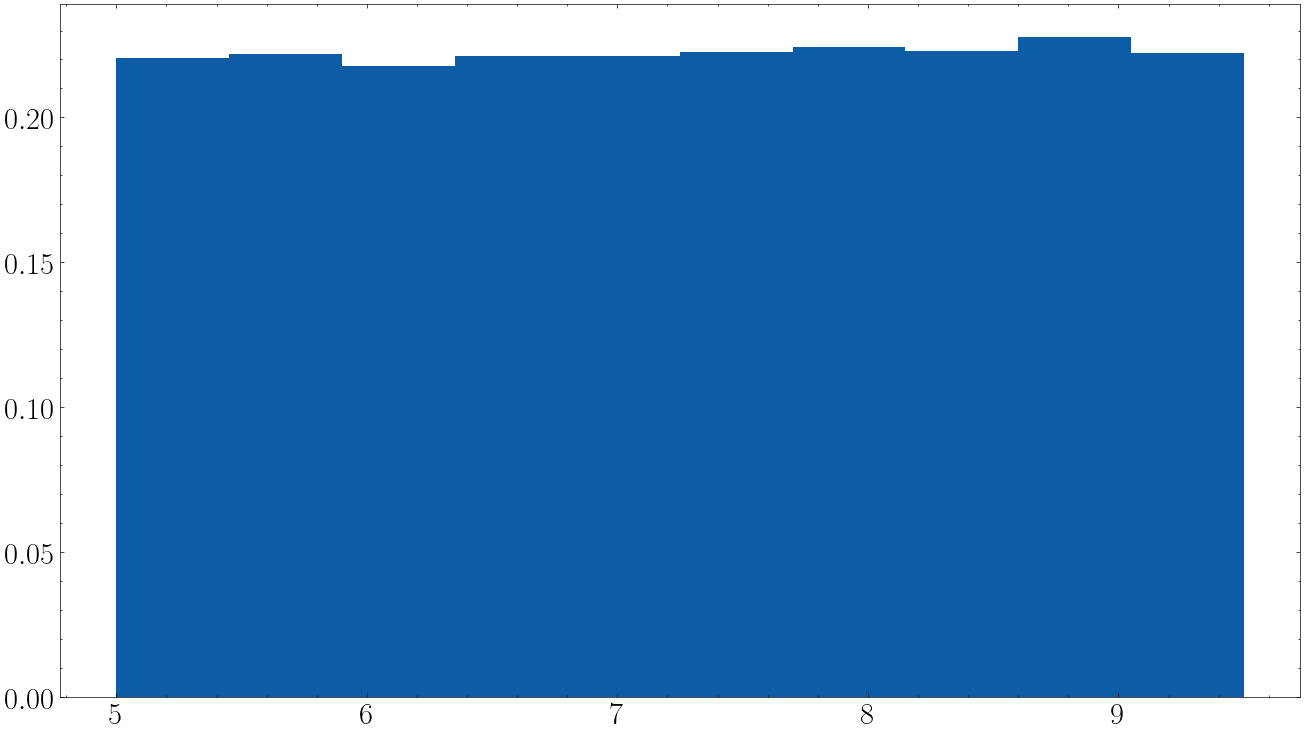

In [99]:
n = (abs(n2-n1)/10)*np.floor(10*np.random.rand(100000)) + min(n1,n2)
plt.figure(figsize = (16,9))
# frequency analysis 
plt.hist(n, density = True);

# Question 2

In [4]:
def meet(): 
    meet = 0
    tA = 30*np.random.rand()
    tB = 30*np.random.rand()
    if tA<tB:
        if tB-tA<5:
                meet = 1
    else:
        if tA-tB<10:
            meet = 1
    return meet

In [5]:
N_trials = 100000
prob = np.array([meet() for _ in range(N_trials)])

In [6]:
print("The Probability of meeting is given as -->",sum(prob)/len(prob))

The Probability of meeting is given as --> 0.42916


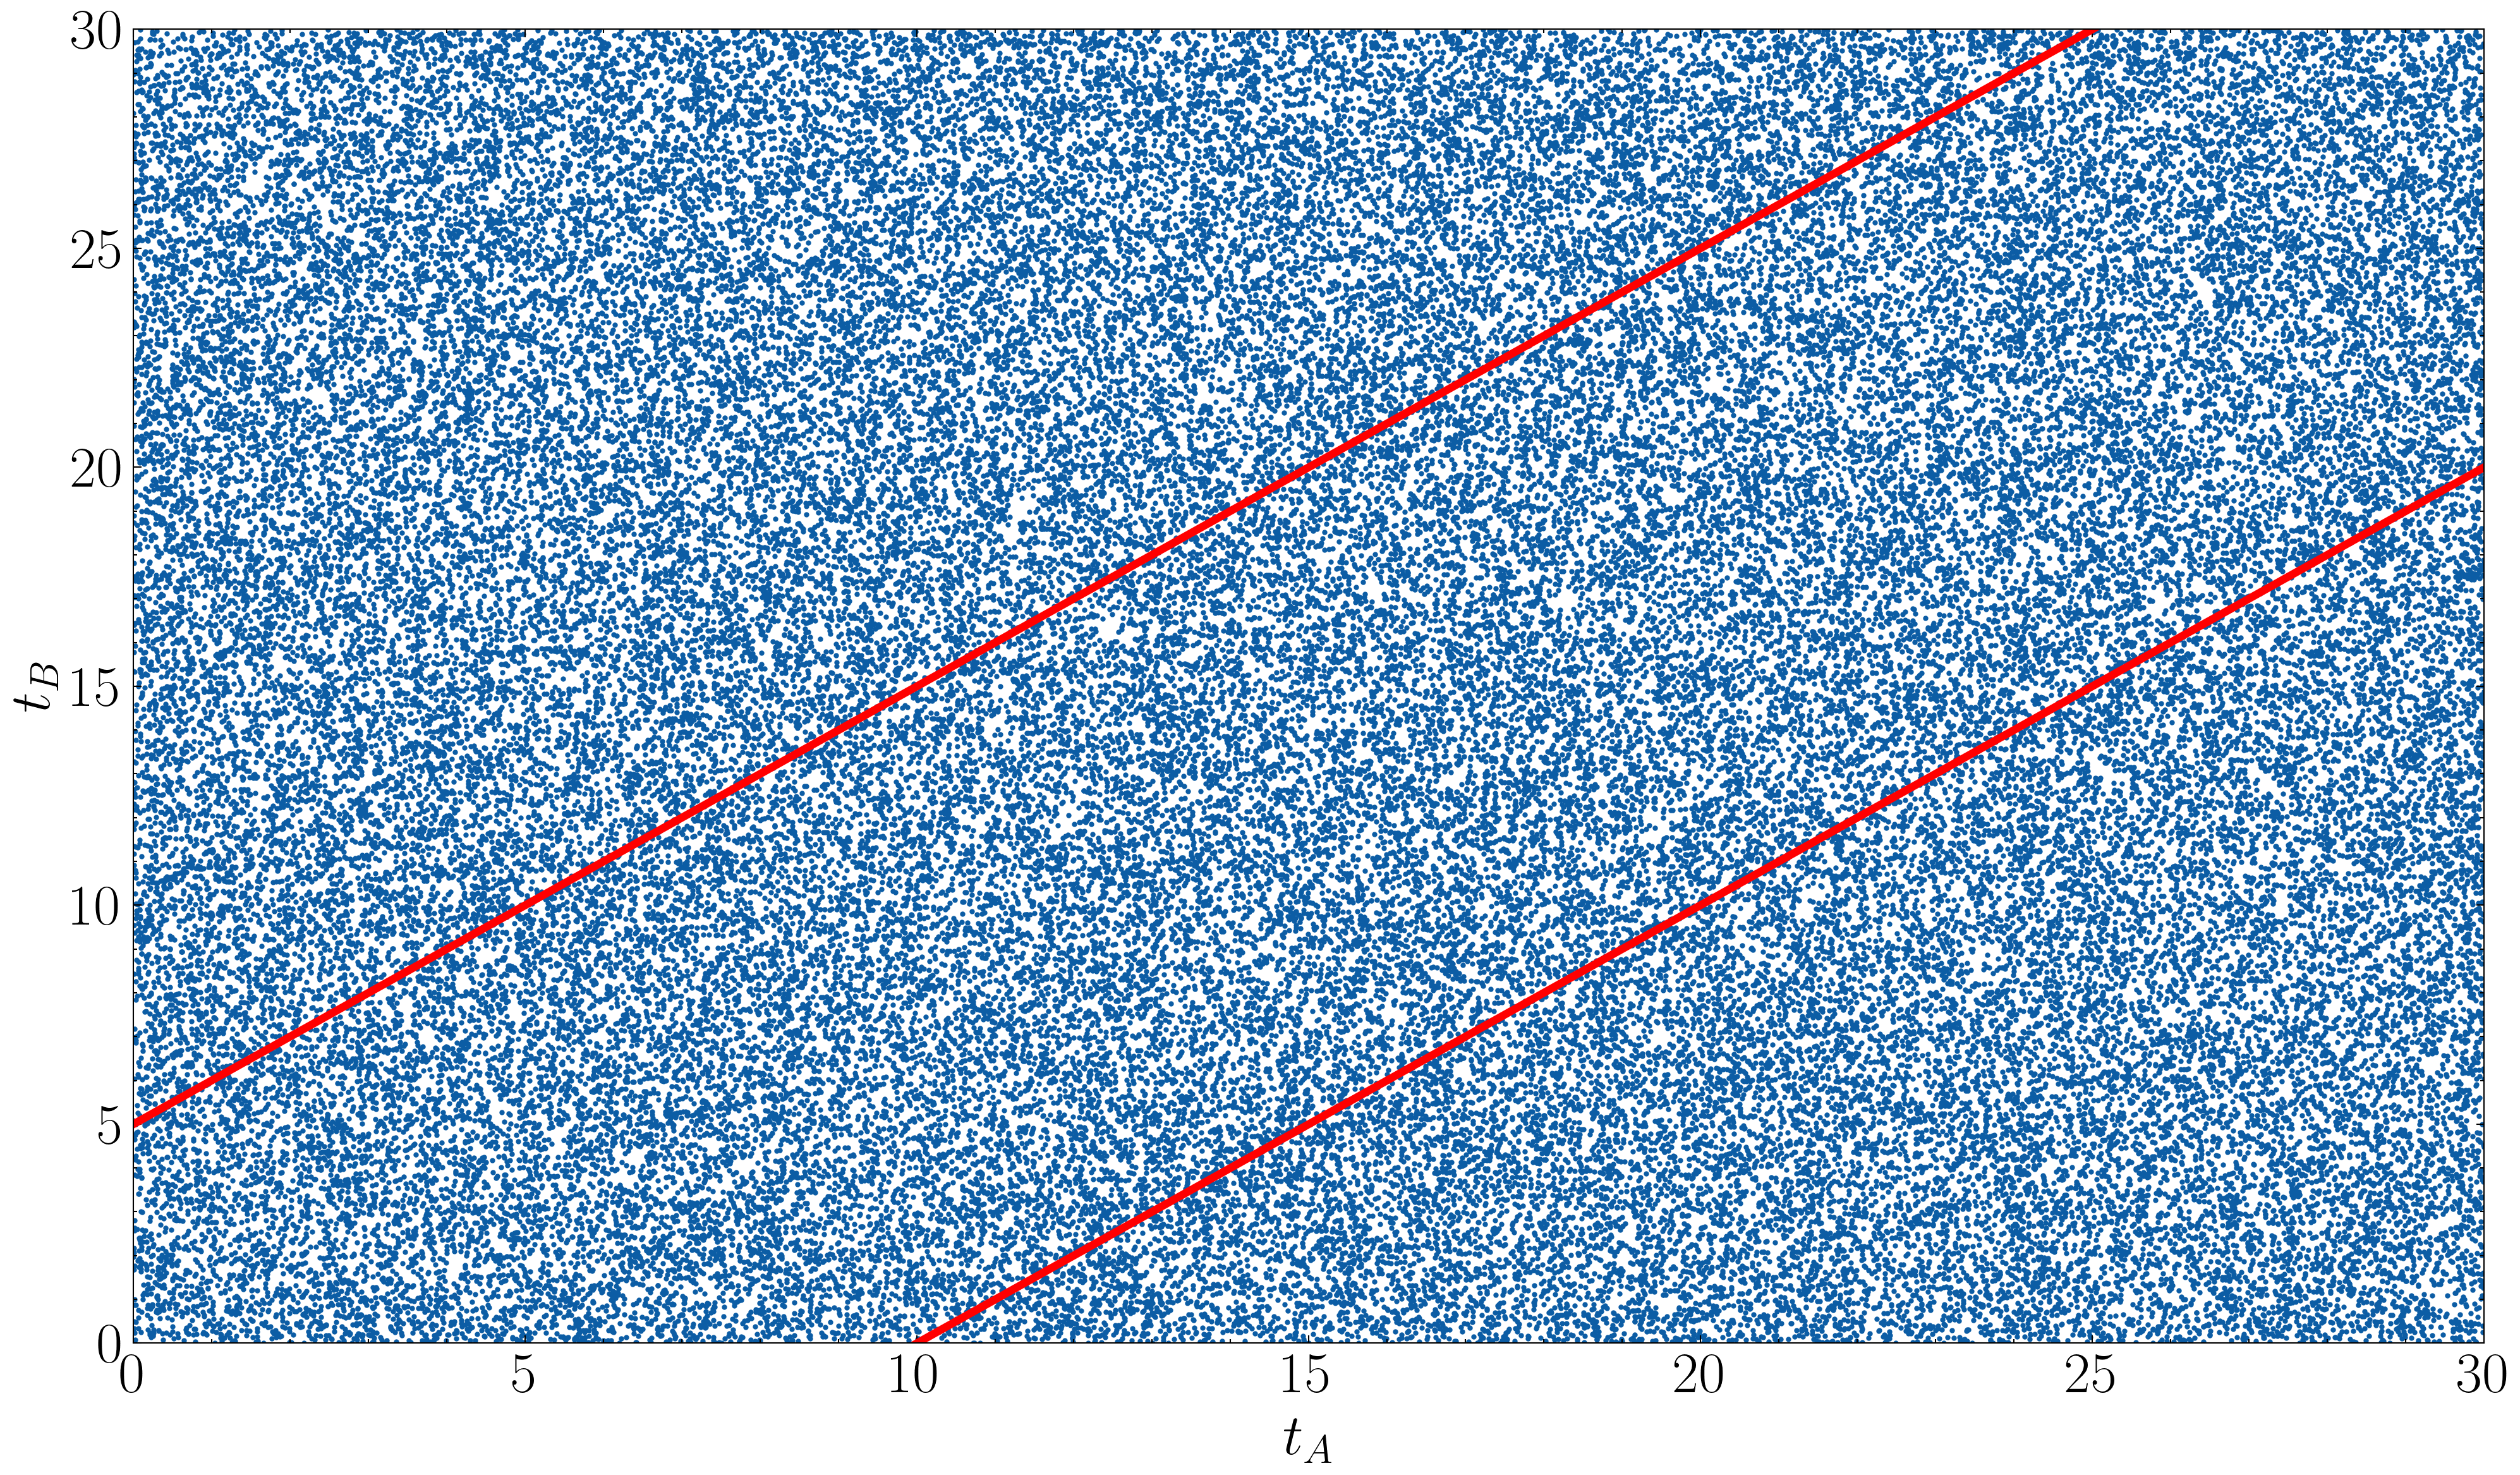

In [35]:
ta = np.linspace(0,30,1000)
l1 = ta+5
l2 = ta -10
plt.figure(figsize = (16,9), dpi = 300)
plt.plot(ta, l1,'r',lw = 3)
plt.plot(ta, l2,'r',lw = 3)
plt.xlim(0,30)
plt.ylim(0,30)

random_gen = np.asarray([30*np.random.rand(2) for _ in range(N_trials)])
plt.scatter(random_gen[:,0], random_gen[:,1], s=1)
plt.xlabel(r"$t_A$")
plt.ylabel(r"$t_B$");

In [36]:
# find which points are between the lines 
prob_mc = [1 if random_gen[i][1] - random_gen[i][0]<=5 and random_gen[i][0] - random_gen[i][1]<=10 else 0 for i in range(N_trials)  ]

In [37]:
print("The probability using a monte carlo integrator is given as -->",sum(prob_mc)/N_trials)

The probability using a monte carlo integrator is given as --> 0.42884


# Question 3

Buffon's needle

In [100]:
# l = np.pi**2/20
l = 2
# Fixed d=1 allows for nicer looking code
# changing d1 just requires an small modification later
d = 1
box = 20

In [105]:
pins = 10000
strips = np.arange(0,box+1,d)
p_s = np.asarray([(box-2*l)*np.random.rand(2) for _ in range(pins)])
# p_e = np.asarray([[i[0]+l*np.cos(2*np.pi*rand()), i[1]+l*np.sin(2*np.pi*rand())] for i in p_s])
p_e = []
pr0b = []
for i in p_s:
    theta = 2*np.pi*rand()
    p_e.append([i[0]+l*np.cos(theta), i[1]+l*np.sin(theta)])
    if np.floor(i[0]) == np.floor(i[0]+l*np.cos(theta)):
        pr0b.append(0)
    else:
        pr0b.append(1)
p_e = np.asarray(p_e)
# p_e,p_s

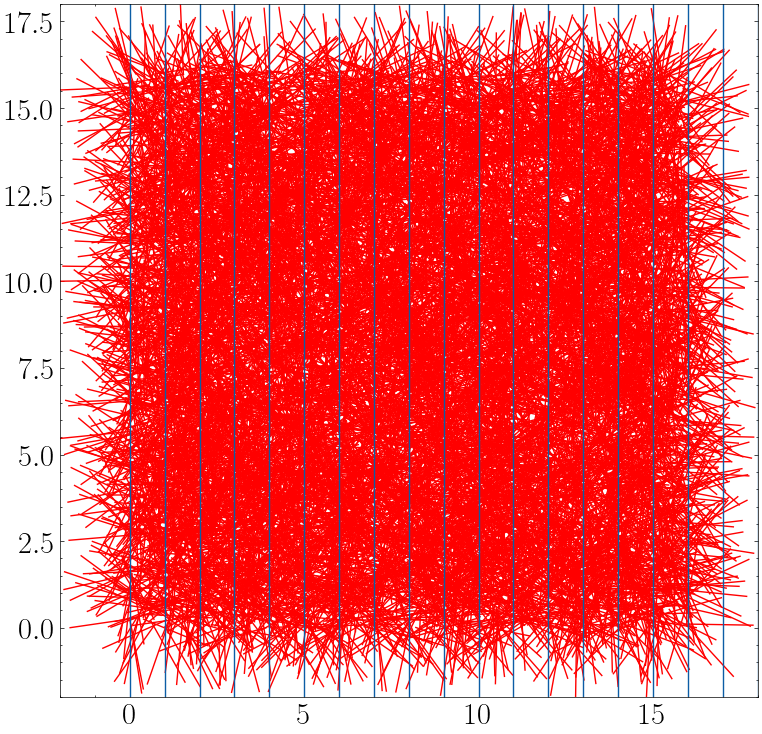

In [106]:
plt.figure(figsize=(9,9))
plt.xlim((-1*l,box-l))
plt.ylim((-1*l,box-l))
for i in range(pins):
    plt.plot([p_s[i,0], p_e[i,0]],[p_s[i,1], p_e[i,1]],'r', lw=1)
for i in strips:
    plt.axvline(i)

In [107]:
print("The measured probability of the problem -->",sum(pr0b)/pins)

The measured probability of the problem --> 0.8459


In [108]:
if l>d:
    # theoretical probability for l>d
    prob_th = 2/np.pi *(np.acos(d/l) + l/d*(1 - np.sqrt(1 - (d/l)**2)))
else:
    # theoretical probability for l<=d
    prob_th = (2/np.pi)*(l/d)
print("The theoretical probability for l>d is -->",prob_th_l)


The theoretical probability for l>d is --> 0.8372484205582454


# Question 4

In [116]:
N = 50
walkers = 1000000
x0 = 0
uni = np.random.uniform

# function returns the whole random walk
@jit
def rw(N, x0):
    x = np.zeros(N)
    x[0] = x0
    # equivalent to rand.uniform.choice((-1,1))
    # chooses from {-1,1} with equal probability
    st = 2*np.floor(2*rand(N-1))-1
    x[1:] = x0 + np.cumsum(st)
    return x


# function only returns the last position of a random walk
@jit
def lastrw(N, x0):
    x = x0
    st = sum(2*np.floor(2*rand(N-1))-1)
    x = x + st
    return x

In [117]:
xst = np.array([lastrw(N,x0) for _ in range(walkers)])

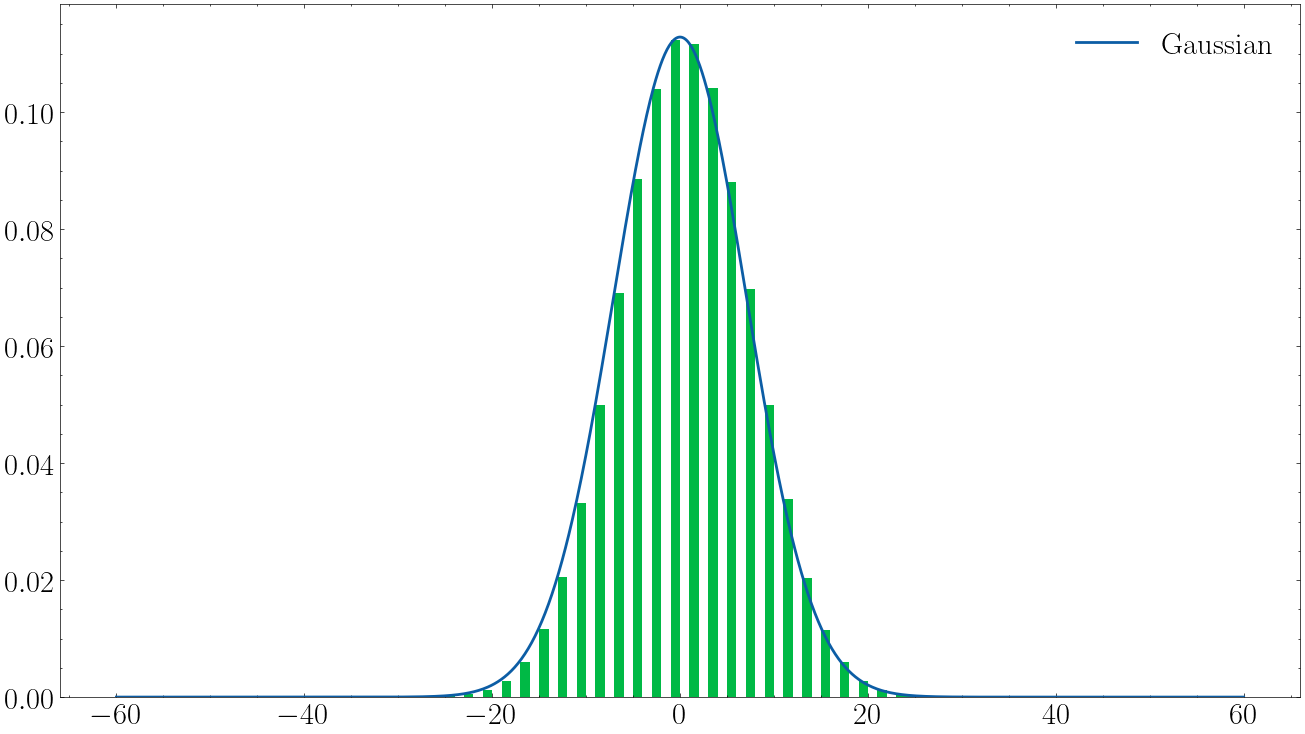

In [118]:
plt.figure(figsize = (16,9))
xdist = np.linspace(-60,60, 1000)
xdist1 = np.linspace(-50,50, walkers)
# gauss = 2*st.norm.pdf(xdist,0,np.sqrt(N))
gauss = np.sqrt(2/(np.pi*N))*np.exp(-(xdist-x0)**2/(2*N))
bins = np.linspace(-int(N/2 + x0),int(N/2 +x0),N+1)
plt.plot(xdist, gauss, lw =2, label = "Gaussian")
plt.hist(xst, bins = bins, density= True);
plt.legend()
# plt.scatter(xdist1,xst)

Note: In this graph, if we set N = even, then odd numbers will not be visited, so we get the periodic gaps in the histogram where the bins are the integer sites. We observe the same case for N = odd.

This is why there is an extra 2 factor in the the probability distribution predicted.

Below we have two different implementations for the walkers at the nth step

In [112]:
# Method 1
# Generate walkers and let them walk one step each
def std_check(walkers):
    w = np.zeros(walkers)
    x = np.zeros(N-1)
    for i in range(1,N):
        w = w + 2*np.floor(2*rand(walkers))-1
        x[i-1] =sum(w**2)/walkers
    return x

In [113]:
# Method 2
# run individual random walks for each step again and again(more computationally expensive but reuses previous code)
def std_check_2(walkers):
    w = np.zeros(walkers)
    x = np.zeros(N-1)
    for i in range(1,N):
        # w = w + 2*np.floor(2*rand(walkers))-1
        x[i-1] =sum([rw(i,0)[-1]**2 for _ in range(walkers)])/walkers
    return x

Text(0, 0.5, '$\\langle x^2 \\rangle$')

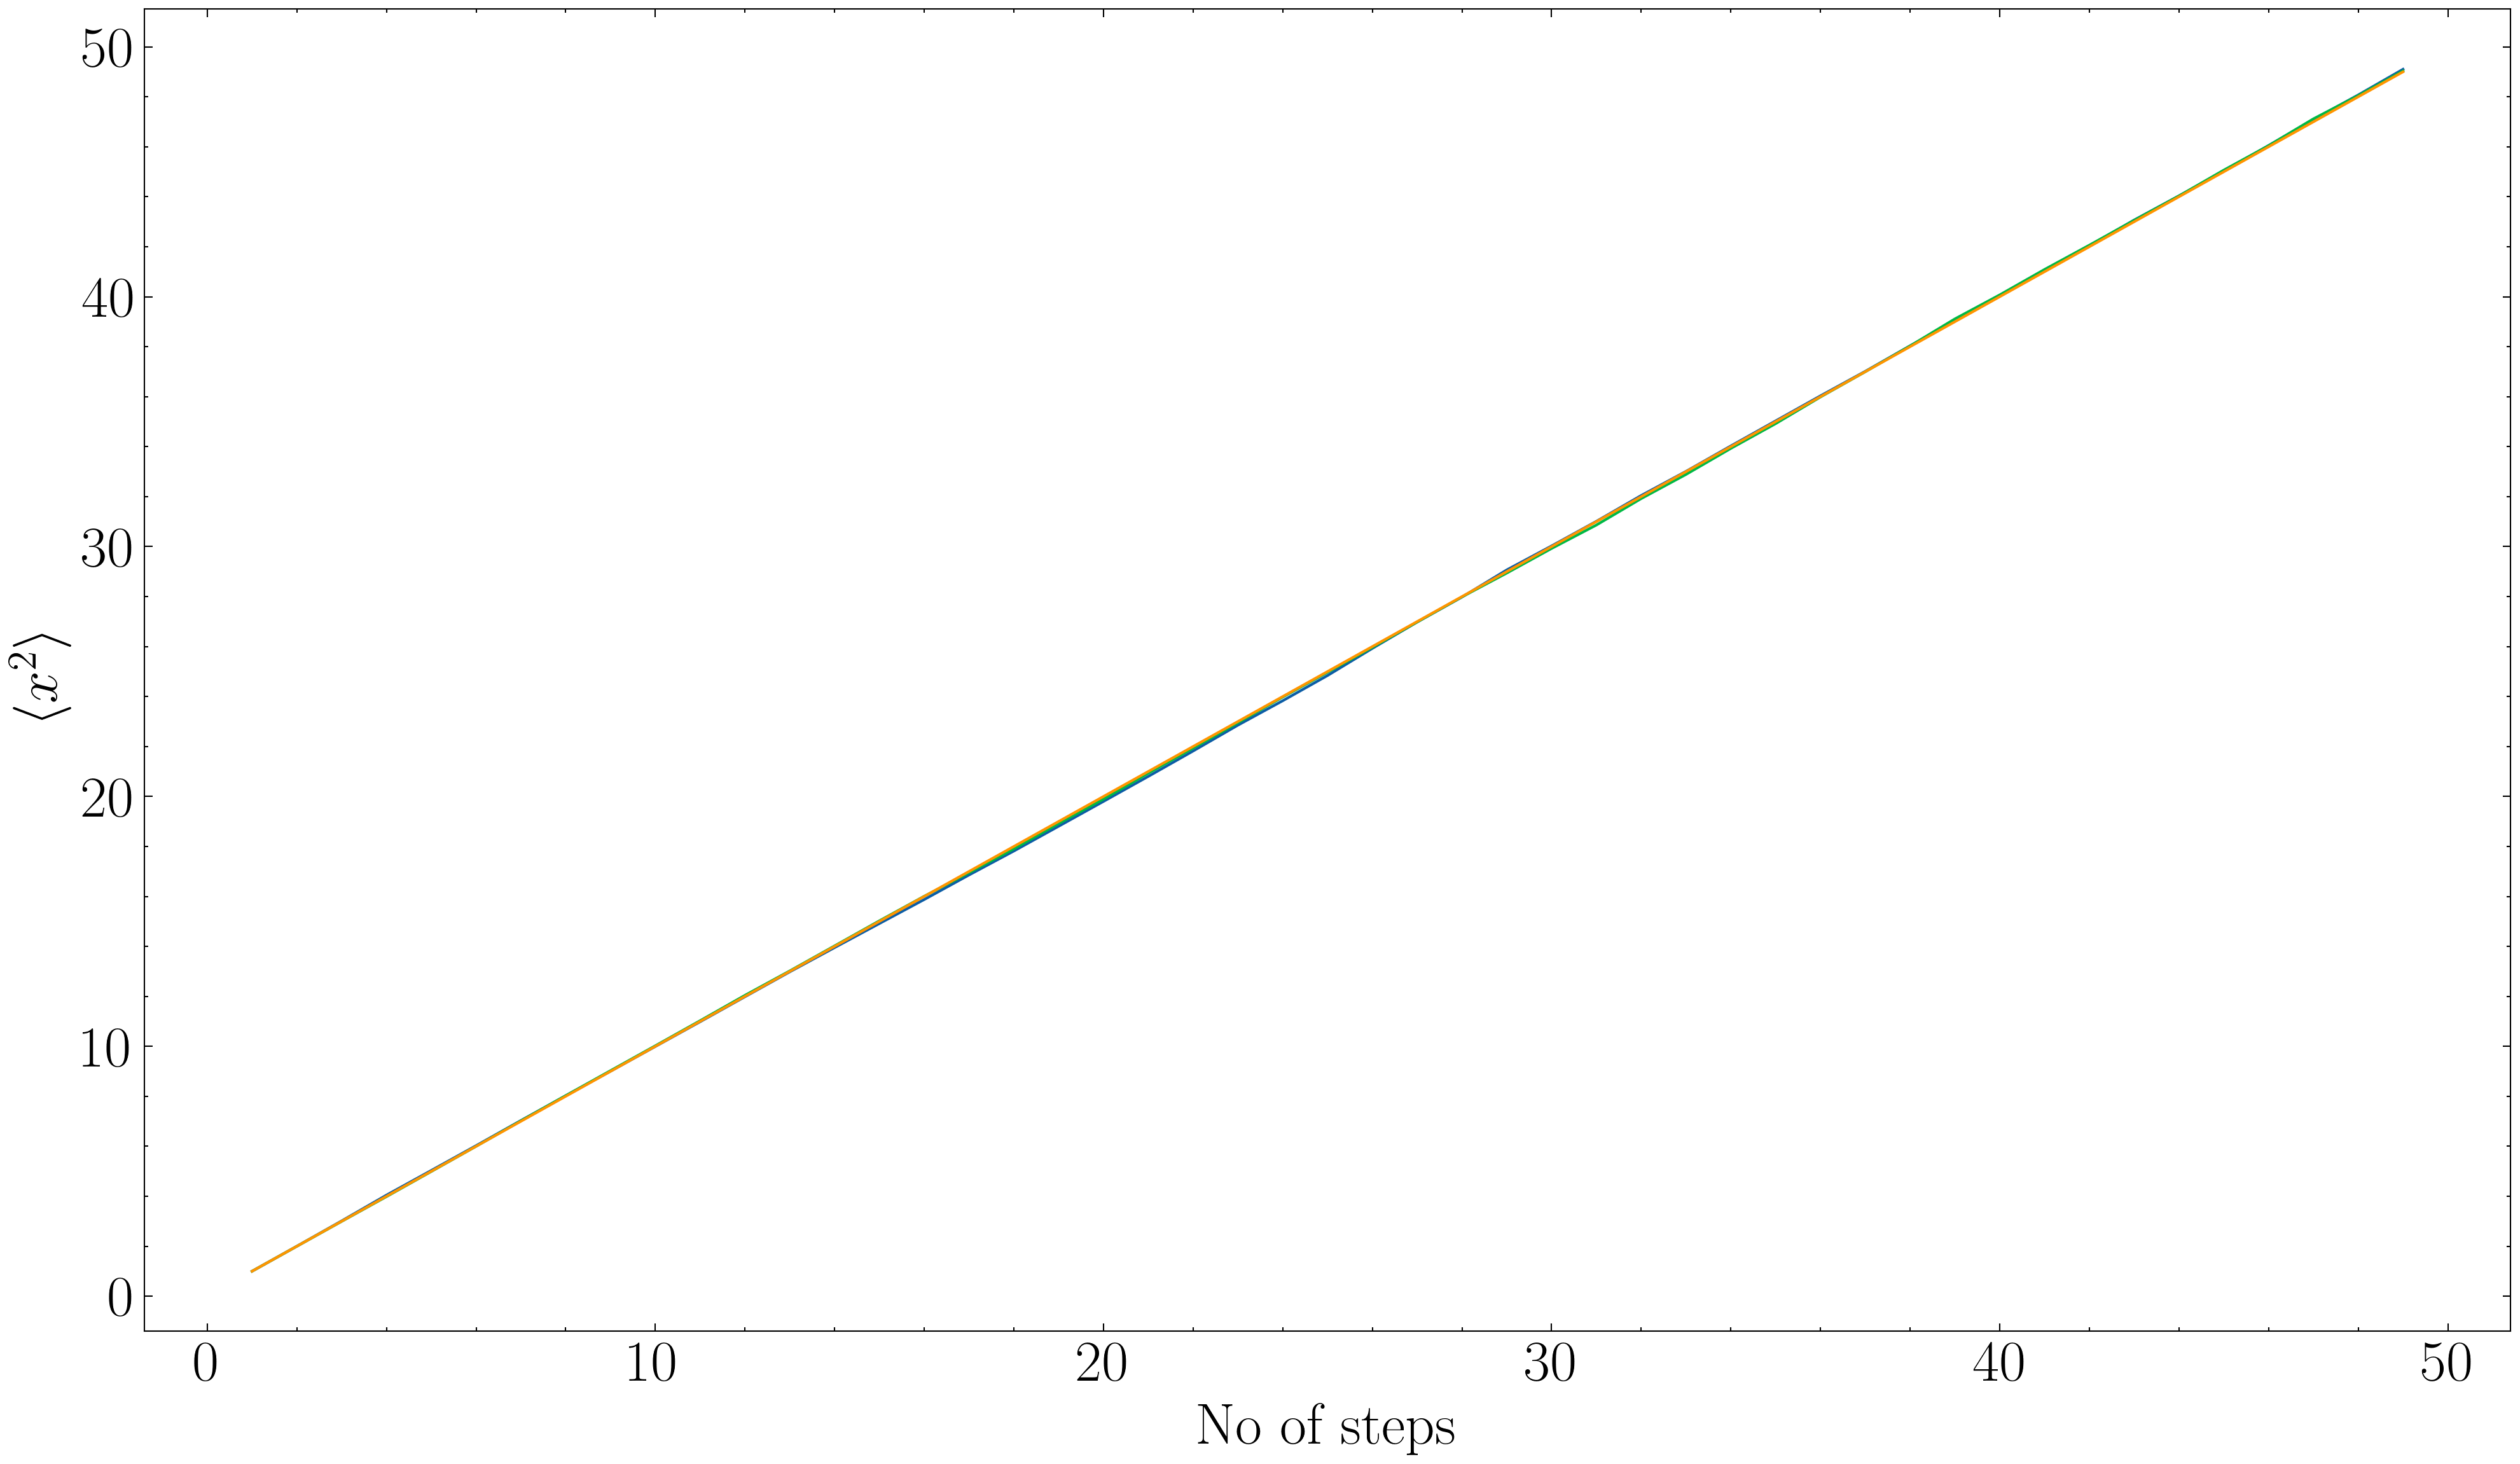

In [114]:
N = 50
walkers = 100000
y1 = std_check(walkers)
y2 = std_check(walkers)
t = np.arange(1,N)
plt.figure(figsize = (16,9), dpi =300)
plt.plot(t,y1, label = "Method 1")
plt.plot(t,y2, label = "Method 2")
plt.plot(t,t, label = r"$y = x$")
plt.xlabel("No of steps")
plt.ylabel(r"$\langle x^2 \rangle$")

In [57]:
rw(1,100)

array([100.])